In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step0 Load Data

The dataset can be downloaded from: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci/data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\QC\.cache\kagglehub\datasets\mashlyn\online-retail-ii-uci\versions\3


In [3]:
# --- 1. Set File Path ---
file_name = 'online_retail_II.csv'
file_path = os.path.join(path, file_name)

# --- 2. Load Data ---
# Specify encoding='latin1' as this dataset is known to use this encoding.
# Common alternatives include 'iso-8859-1' or 'windows-1252' if 'latin1' fails.
try:
    df = pd.read_csv(file_path, encoding='latin1')
    print(f"Data loaded successfully from: {file_path}")
except FileNotFoundError:
    print(f"Error: File not found at the specified path.")
    print(f"Please check if the path is correct: {file_path}")
    print(f"Current working directory is: {os.getcwd()}")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Consider trying a different encoding, e.g., 'iso-8859-1' or 'windows-1252'.")

Data loaded successfully from: C:\Users\QC\.cache\kagglehub\datasets\mashlyn\online-retail-ii-uci\versions\3\online_retail_II.csv


## Basic Data Exploration

In [4]:
# Assume 'df' is loaded successfully from the previous step
if 'df' in locals():
    
    # --- 3. Display Basic Information ---
    print("\n--- Basic Dataset Information ---")
    
    # Print total rows and columns
    print(f"Total Rows: {df.shape[0]}")
    print(f"Total Columns: {df.shape[1]}")
    
    # Print all column names
    print("\nColumn Names:")
    print(list(df.columns))
    
    # Display the first 5 rows to inspect the data
    print("\nData Head (First 5 Rows):")
    print(df.head())
    
    # Print descriptive statistics for key numerical columns
    print("\nDescriptive Statistics (Quantity & Price):")
    # Set float format to avoid scientific notation
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    print(df[['Quantity', 'Price']].describe())


--- Basic Dataset Information ---
Total Rows: 1067371
Total Columns: 8

Column Names:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Data Head (First 5 Rows):
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom

## Visualization


--- Plotting Distributions ---


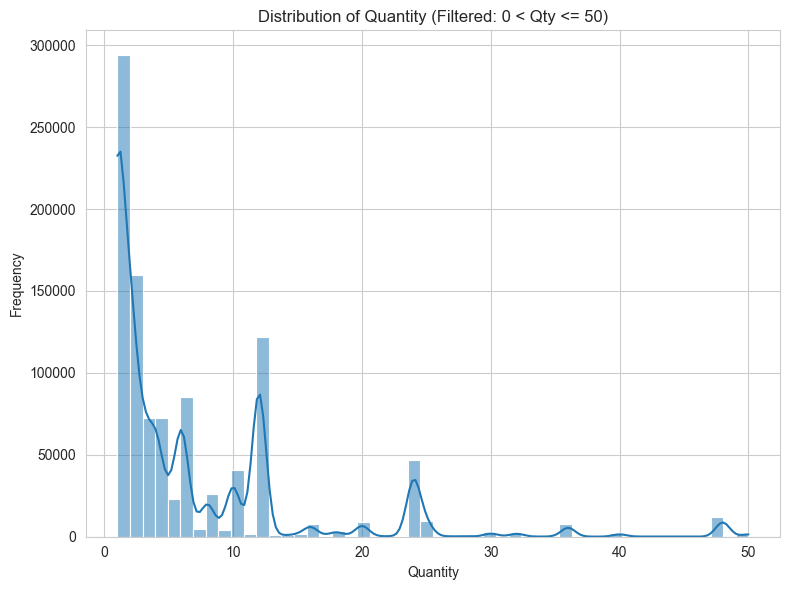

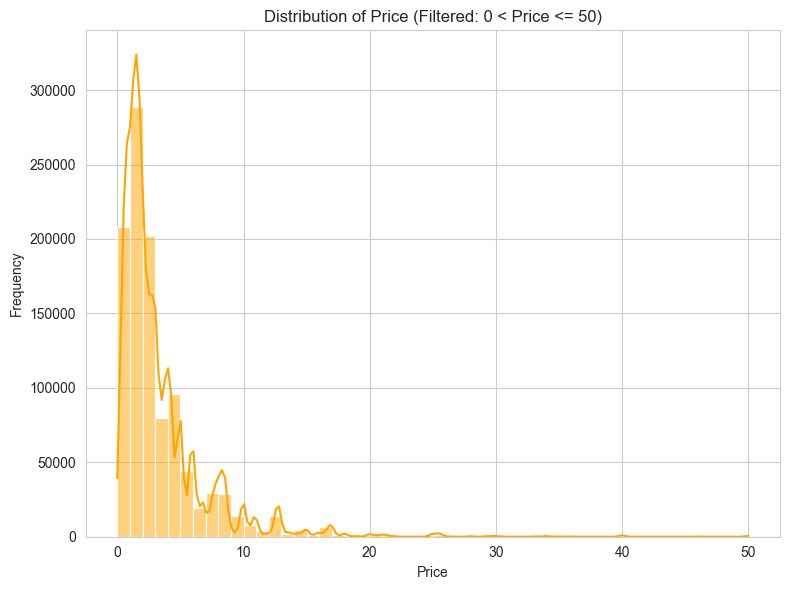

Visualization complete.


In [5]:
# --- 4. Visualization: Quantity and Price Distributions ---
if 'df' in locals():
    print("\n--- Plotting Distributions ---")
    
    # Set the visual style for the plots
    sns.set_style("whitegrid")

    # Prepare filtered data for visualization (avoid extreme outliers)
    qty_filtered = df[(df['Quantity'] > 0) & (df['Quantity'] <= 50)]
    price_filtered = df[(df['Price'] > 0) & (df['Price'] <= 50)]

    # --- Plot 1: Quantity Distribution (separate figure) ---
    plt.figure(figsize=(8, 6))
    sns.histplot(qty_filtered['Quantity'], bins=50, kde=True, color='tab:blue')
    plt.title('Distribution of Quantity (Filtered: 0 < Qty <= 50)')
    plt.xlabel('Quantity')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Price Distribution (separate figure) ---
    plt.figure(figsize=(8, 6))
    sns.histplot(price_filtered['Price'], bins=50, kde=True, color='orange')
    plt.title('Distribution of Price (Filtered: 0 < Price <= 50)')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    print("Visualization complete.")

Total Rows: 1067371
Total Columns: 8

Column Names:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

#  Step1 Data Processing

## Convert Data Types

In [6]:
print("Converting Data Types...")

try:
    # 1. Convert InvoiceDate
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    
    # 2. Convert Price
    df['Price'] = df['Price'].astype(float)
    
    # 3. Convert Quantity (Nullable Integer)
    df['Quantity'] = df['Quantity'].astype(float)
    
    # 4. Convert other key columns to string (object)
    string_cols = ['Invoice', 'StockCode', 'Description', 'Country']
    for col in string_cols:
        # astype(str) is fine for these columns
        df[col] = df[col].astype(str)
        
    # 5. [THE FIX] Convert Customer ID (Float -> Int64 -> String)
    # This correctly handles NaNs (as <NA>) AND removes the '.0' (e.g., '13085.0' -> '13085')
    df['Customer ID'] = pd.to_numeric(df['Customer ID'], errors='coerce').astype('Int64').astype('string')
    
    print("Data types converted successfully.")
    
    # 6. Print new data types to verify changes
    print("\nNew Data Types (dtypes):")
    df.info()

except Exception as e:
    print(f"Error during type conversion: {e}")

Converting Data Types...
Data types converted successfully.

New Data Types (dtypes):
<class 'pandas.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  str           
 1   StockCode    1067371 non-null  str           
 2   Description  1062989 non-null  str           
 3   Quantity     1067371 non-null  float64       
 4   InvoiceDate  1067371 non-null  datetime64[us]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   string        
 7   Country      1067371 non-null  str           
dtypes: datetime64[us](1), float64(2), str(4), string(1)
memory usage: 65.1 MB


## Drop invalid and duplicate rows

In [7]:
print("Cleaning Data...")

# Drop rows with invalid Customer ID formats
df_clean = df.dropna(subset=['Customer ID'])

# Drop duplicate rows
df_clean = df_clean.drop_duplicates()

# Print remaining rows after cleaning
print(f"Remaining Rows after Cleaning: {df_clean.shape[0]}")

Cleaning Data...
Remaining Rows after Cleaning: 797885


## Removing Non-Product Rows

In [8]:
print(f"--- Removing Non-Product Rows (Final Rule) ---")
print("Rule: Remove any row where StockCode starts with a letter.")
    
rows_before = df_clean.shape[0]
print(f"Original row count: {rows_before}")

# Find StockCode beginning with letters
letter_start_mask = df_clean['StockCode'].str.match(r'^[a-zA-Z]') == True
discovered_special_codes = df_clean[letter_start_mask]['StockCode'].unique()

# Find Invoice beginning with 'c'
invoice_start_mask = df_clean['Invoice'].str.match(r'^c', case=False) == True
discovered_special_invoices = df_clean[invoice_start_mask]['Invoice'].unique()

# Remove those rows
df_clean = df_clean[~letter_start_mask & ~invoice_start_mask].copy()

rows_after = df_clean.shape[0]
rows_removed = rows_before - rows_after

print(f"Removed {rows_removed} non-product rows (StockCode starts with letter).")
print(f"New row count: {rows_after}")

print("\n Final 'StockCode' cleaning complete!")

--- Removing Non-Product Rows (Final Rule) ---
Rule: Remove any row where StockCode starts with a letter.
Original row count: 797885
Removed 21248 non-product rows (StockCode starts with letter).
New row count: 776637

 Final 'StockCode' cleaning complete!


In [9]:
# Save cleaned data to a new CSV file
# Use a relative path so it works for anyone (notebook is in 'code/', data is in '../data/')
import os

# Define output directory relative to the current notebook
output_dir = os.path.join('..', 'data')

# Create the directory if it doesn't exist (optional, but good practice)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_path = os.path.join(output_dir, 'online_retail_II_cleaned.csv')

print(f"Saving data to: {output_path}")
df_clean.to_csv(output_path, index=False, encoding='utf-8')

Saving data to: ..\data\online_retail_II_cleaned.csv
